In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from time import time
import datetime 
import warnings

warnings.filterwarnings('ignore')

In [3]:
tickerSymbol = 'TCS.NS'
data = yf.Ticker(tickerSymbol)
data

yfinance.Ticker object <TCS.NS>

In [4]:
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=730)
tomorrow = end_date + datetime.timedelta(days=1)
prices = data.history(start=start_date, end=end_date).Close
prices

Date
2022-06-06 00:00:00+05:30    3264.499268
2022-06-07 00:00:00+05:30    3199.561035
2022-06-08 00:00:00+05:30    3238.999512
2022-06-09 00:00:00+05:30    3260.835938
2022-06-10 00:00:00+05:30    3196.896240
                                ...     
2024-05-27 00:00:00+05:30    3847.050049
2024-05-28 00:00:00+05:30    3839.899902
2024-05-29 00:00:00+05:30    3803.649902
2024-05-30 00:00:00+05:30    3736.100098
2024-05-31 00:00:00+05:30    3670.949951
Name: Close, Length: 490, dtype: float64

In [5]:
#calculae returns
returns = prices.pct_change().dropna()
returns

Date
2022-06-07 00:00:00+05:30   -0.019892
2022-06-08 00:00:00+05:30    0.012326
2022-06-09 00:00:00+05:30    0.006742
2022-06-10 00:00:00+05:30   -0.019608
2022-06-13 00:00:00+05:30   -0.041757
                               ...   
2024-05-27 00:00:00+05:30   -0.000636
2024-05-28 00:00:00+05:30   -0.001859
2024-05-29 00:00:00+05:30   -0.009440
2024-05-30 00:00:00+05:30   -0.017759
2024-05-31 00:00:00+05:30   -0.017438
Name: Close, Length: 489, dtype: float64

Text(0.5, 1.0, 'TCS Stock Price')

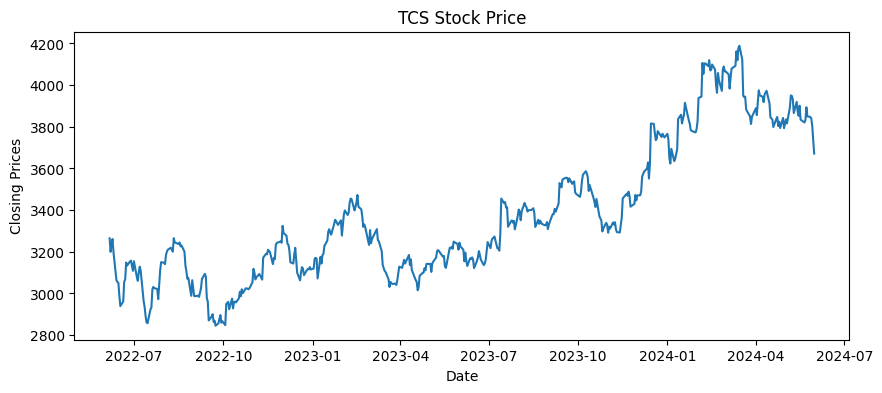

In [9]:
#plot the stock prices 
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.title('TCS Stock Price')

Text(0.5, 1.0, 'Returns')

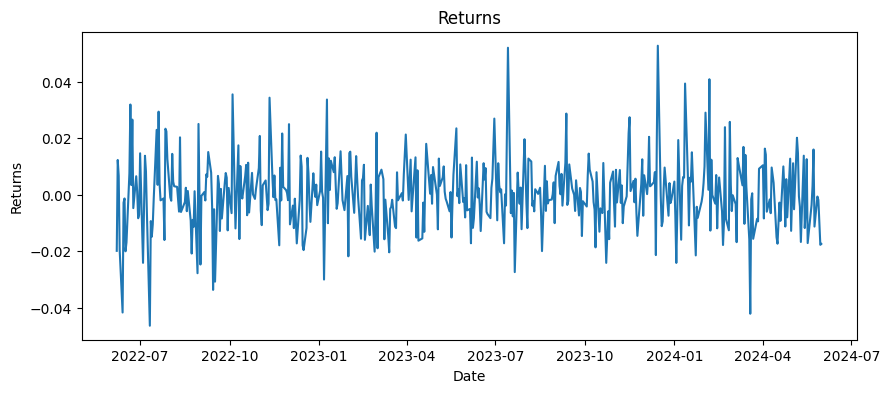

In [10]:
#plot returns
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Returns')
plt.xlabel('Date')
plt.title('Returns')

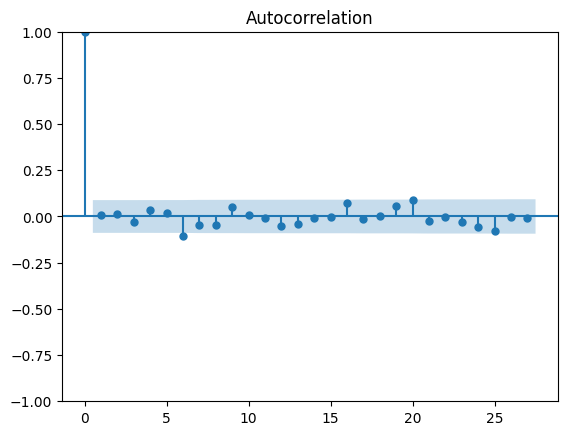

In [11]:
#ploting acf(MA) and pcf(AR)
plot_acf(returns)
plt.show()

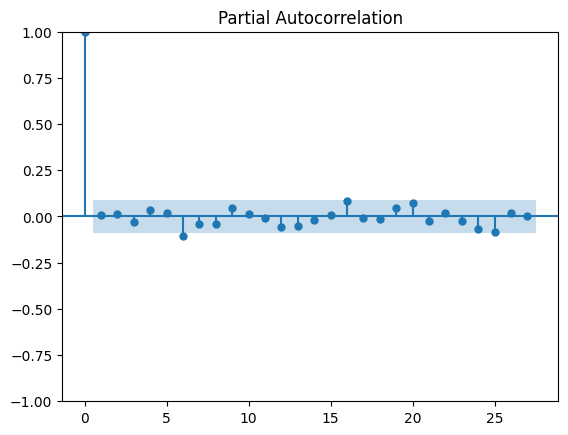

In [13]:
plot_pacf(returns, method='ywm')
plt.show()

In [15]:
#building the model of ARIMA
model = ARIMA(prices,order=(7,0,6))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  490
Model:                 ARIMA(7, 0, 6)   Log Likelihood               -2525.581
Date:                Mon, 03 Jun 2024   AIC                           5081.162
Time:                        11:19:53   BIC                           5144.078
Sample:                             0   HQIC                          5105.871
                                - 490                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3372.7734    255.980     13.176      0.000    2871.061    3874.486
ar.L1          1.1690      0.356      3.280      0.001       0.470       1.867
ar.L2          0.1208      0.501      0.241      0.8

In [16]:
#predict next 100 day's price
next_day_price = fitted.forecast(100,alpha=0.05)
print(next_day_price)

490    3667.296880
491    3659.476242
492    3661.527342
493    3663.714819
494    3670.052091
          ...     
585    3537.668202
586    3536.525160
587    3535.391192
588    3534.265549
589    3533.147150
Name: predicted_mean, Length: 100, dtype: float64


In [19]:
#viewing the next day's price from above 
predicted_price=next_day_price.values[0]
print("prediction of tomorrow's price: ",predicted_price)

prediction of tomorrow's price:  3667.2968801082266
